In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Noe's BRKLYN OP.csv")

df.head()

,Unnamed: 0,borough,neighborhood,building class category,tax class at present,block,lot,ease-ment,building class at present,address,...,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date,gross square feet log,sale price log
0,25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVENUE,...,1,2058,1492,1930,1,A9,560000,2013-06-06,7.307873,13.235692
1,26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH STREET,...,1,4833,1724,1930,1,A1,860000,2012-12-18,7.452402,13.664688
2,27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH STREET,...,1,2417,2132,1930,1,A9,508000,2012-08-24,7.664816,13.138237
3,28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH STREET,...,1,3867,1704,1899,1,A1,600000,2013-06-18,7.440734,13.304685
4,30,3,BATH BEACH,01 ONE FAMILY HOMES,1,6380,69,,S1,8662 BAY PARKWAY,...,2,2707,3304,1960,1,S1,820000,2012-11-29,8.102889,13.617060


In [14]:
# edit data file...
df.drop('Unnamed: 0', axis=1, inplace=True)

# zeros, not allowed
df = df[df['gross square feet log'] != 0.0]

df.shape

(6399, 23)

Here we make a basic linear regression, calculate the residuals, and visualize the distribution of the residuals

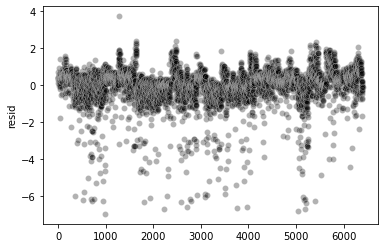

In [15]:
# summary

# define x and y
x = df['gross square feet log']
y = df['sale price log']

# linear reg
m, b = np.polyfit(x,y,1)
df['pred val log'] = m * x + b

# resid
df['resid'] = df['sale price log'] - df['pred val log']

# plot
sns.scatterplot(x=np.arange(len(x)), y=df['resid'], alpha=0.3, color='black')
plt.show()

count    6.399000e+03
mean     5.740472e-15
std      9.364797e-01
min     -6.957084e+00
25%     -2.933654e-01
50%      1.411737e-01
75%      4.700789e-01
max      3.699539e+00
Name: resid, dtype: float64


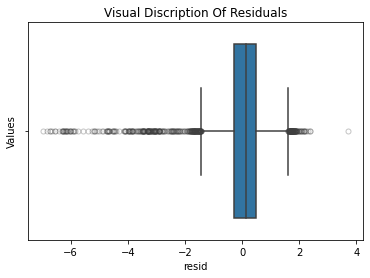

In [16]:
print(df['resid'].describe())

sns.boxplot(x=df['resid'],flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3})

plt.title('visual discription of residuals'.title())
plt.ylabel('Values')
plt.show()

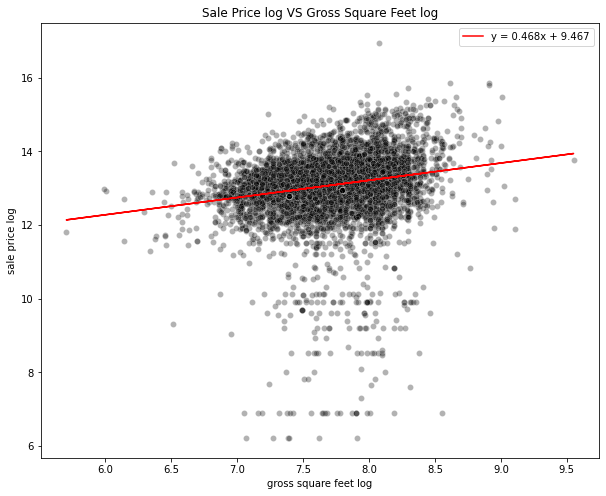

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))

sns.scatterplot(data=df, x='gross square feet log', y='sale price log', alpha=0.3,color='black')
plt.plot(x,df['pred val log'], 'r', label=f"y = {m:.3f}x + {b:.3f}")
plt.title('Sale Price log VS Gross Square Feet log')
plt.legend()
plt.show()

In [18]:
# add the log of 'land square feet' to df
df['land square feet log'] = np.log(df['land square feet'].astype('float'))

We now create a linear regression using categorical values, calculate the residuals and visualize them.

In [19]:
dummy = pd.get_dummies(df['neighborhood'], prefix='NB')
sqfts = df[['gross square feet log','land square feet log']]
new_df = sqfts.join(dummy)

print(new_df.shape)

new_df.sample(10)

(6399, 62)


,gross square feet log,land square feet log,NB_BATH BEACH,NB_BAY RIDGE,NB_BEDFORD STUYVESANT,NB_BENSONHURST,NB_BERGEN BEACH,NB_BOERUM HILL,NB_BOROUGH PARK,NB_BRIGHTON BEACH,...,NB_SEAGATE,NB_SHEEPSHEAD BAY,NB_SPRING CREEK,NB_SUNSET PARK,NB_WILLIAMSBURG-CENTRAL,NB_WILLIAMSBURG-EAST,NB_WILLIAMSBURG-NORTH,NB_WILLIAMSBURG-SOUTH,NB_WINDSOR TERRACE,NB_WYCKOFF HEIGHTS
5631,8.048149,7.995307,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,6.461468,7.487174,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,7.886081,7.536364,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3520,7.090077,8.003697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4831,7.189922,7.600902,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4002,7.473069,7.644919,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,7.609862,7.690286,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,7.572503,7.863267,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5730,7.933797,7.600902,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3617,7.712444,7.600902,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


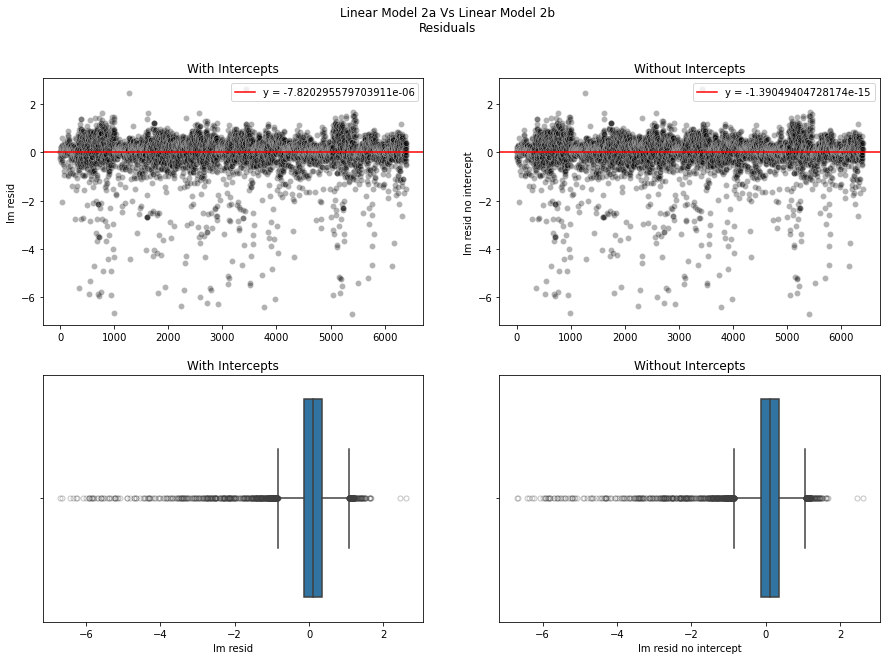

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# variables
x = new_df
y = df['sale price log']

# model
lm2a = LinearRegression()
lm2b = LinearRegression(fit_intercept=False)

# fit
lm2a.fit(x,y)
lm2b.fit(x,y)

# predict
pred2a = lm2a.predict(x)
pred2b = lm2b.predict(x)

# residuals
df['lm resid'] = df['sale price log'] - pred2a
df['lm resid no intercept'] = df['sale price log'] - pred2b

# 2 by 2 plot of residuals scatter plot and boxplot
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Linear Model 2a Vs Linear Model 2b\nResiduals')

sns.scatterplot(x=np.arange(len(x)), y=df['lm resid'], alpha=0.3, color='black', ax=ax[0,0])
ax[0,0].axhline(y=df['lm resid'].mean(), color='r', label='y = {}'.format(df['lm resid'].mean()))
ax[0,0].set_title('with intercepts'.title())
ax[0,0].legend()

sns.scatterplot(x=np.arange(len(x)), y=df['lm resid no intercept'], alpha=0.3, color='black',ax=ax[0,1])
ax[0,1].axhline(y=df['lm resid no intercept'].mean(), color='r', 
                label='y = {}'.format(df['lm resid no intercept'].mean()))
ax[0,1].set_title('without intercepts'.title())
ax[0,1].legend()

sns.boxplot(x=df['lm resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,0])
ax[1,0].set_title('with intercepts'.title())

sns.boxplot(x=df['lm resid no intercept'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,1])
ax[1,1].set_title('without intercepts'.title())

plt.show()

## Model Performance
Next we want to measure the models performance to get an idea of how well it does. Because Python doesn't have a "summary" model we make a function that measures how well the models do. More information can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html) under '3.3.4. Regression metrics'.

In [50]:
def rse(model, resid):
    """
    'model' refers to the linear model used. 'resid' must be already computed residuals.
    ->The closer to 0 the better.
    
    Helpful if already a single pandas series.
    """
    k=len(model.coef_)-1
    sse=sum(resid**2)
    n=len(resid)
    DF=n-1-k
    
    val = round(((sse / (n - 1 - k))** 0.5),4)
    
    print('-'*40)
    
    print('The smaller the value the better.')
    return print('Residual Standard Error: {} with {} degrees of freedom'.format(val, DF))

def regression_metrics(y_true, y_pred):
    '''
    Explained Variance Score:
    Measures the "dispersion" of a given data set. 
    -> the closer to 1 the better!
    
    Mean Absolute Error:
    A measure of Errors between paired techniques showing the same phenomenon.
    -> the closer to 0 the better!
    
    Mean Squared Error:
    The "average squared" distance between the predicted and observed values.
    -> the closer to zero the better!
    
    Root Mean Squared Error:
    Measures how "BAD" the model predictions is.
    * if your comparing Linear Models, use this metric.
    -> the closer to 0 the better!
    
    R^2 score:
    Measures how well values are to be predicted by the model. Measures the "strength" of the model!
    * not to be confused with "Pearson Coefficiant" (r^2).
    * can be negative without intercepts or when non-linear data is used.
    -> the closer to 1 the better!
    '''
    from sklearn.metrics import explained_variance_score as evs
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import mean_squared_error as mse
    from sklearn.metrics import r2_score as r2
    
    # explained variance
    EVS = round(evs(y_true, y_pred),4)
    
    print('-'*40)

    # bad
    if EVS <= 0.25:
        print('explained variance score: ', EVS)
        print('bad fit')
    # mediocre
    elif EVS <= 0.5:
        print('explained variance score: ', EVS)
        print('mediocre fit')
    # decent
    elif EVS <= 0.75:
        print('explained variance score: ', EVS)
        print('decent fit')
    # good
    elif EVS <= 1.0:
        print('explained variance score: ', EVS)
        print('good fit')
    else:
        print('check inputs.')
    
    print('-'*40)

    # mean absolute error
    MAE = round(mae(y_true, y_pred),4)
    print('The smaller the better.')
    print('mean absolute error: ', MAE)
    
    print('-'*40)

    # mean squared error
    MSE = round(mse(y_true, y_pred),4)
    print('The smaller the better.')
    print('mean squared error: ', MSE)
    
    print('-'*40)

    # root mean squared error
    RMSE = round(mse(y_true, y_pred)**0.5,4)
    print('The smaller the better. Comparing models?')
    print('->root mean squared error: ', RMSE)
    
    print('-'*40)

    R2 = round(r2(y_true, y_pred),4)
    # bad
    if R2 <= 0.25:
        print('R2 score: ', R2)
        print('bad fit')
    # mediocre
    elif R2 <= 0.5:
        print('R2 score: ', R2)
        print('mediocre fit')
    # decent
    elif R2 <= 0.75:
        print('R2 score: ', R2)
        print('decent fit')
    # good
    elif R2 <= 1.0:
        print('R2 score: ', R2)
        print('good fit')
    else:
        print('check inputs.')
    
    return ''

print(regression_metrics(y, pred2a))
rse(lm2a, df['lm resid'])
print(regression_metrics(y,pred2b))
rse(lm2b, df['lm resid no intercept'])

----------------------------------------
explained variance score:  0.3078
mediocre fit
----------------------------------------
The smaller the better.
mean absolute error:  0.4452
----------------------------------------
The smaller the better.
mean squared error:  0.6296
----------------------------------------
The smaller the better. Comparing models?
->root mean squared error:  0.7935
----------------------------------------
R2 score:  0.3078
mediocre fit

----------------------------------------
The smaller the value the better.
Residual Standard Error: 0.7973 with 6337 degrees of freedom
----------------------------------------
explained variance score:  0.3078
mediocre fit
----------------------------------------
The smaller the better.
mean absolute error:  0.4453
----------------------------------------
The smaller the better.
mean squared error:  0.6296
----------------------------------------
The smaller the better. Comparing models?
->root mean squared error:  0.7934
-----

Linear model 2a and 2b are both "mediocre" models based on the regression metrics calculated.

The referenced code includes 'building class category' in its linear model, however, R seems to neglect '01  ONE FAMILY HOMES' as a potential factor in its regression, as an entire row of zeros would indicate 'something else'. Because of this we will create two linear models one with all three values, and another with only 'two' and 'three' family homes.

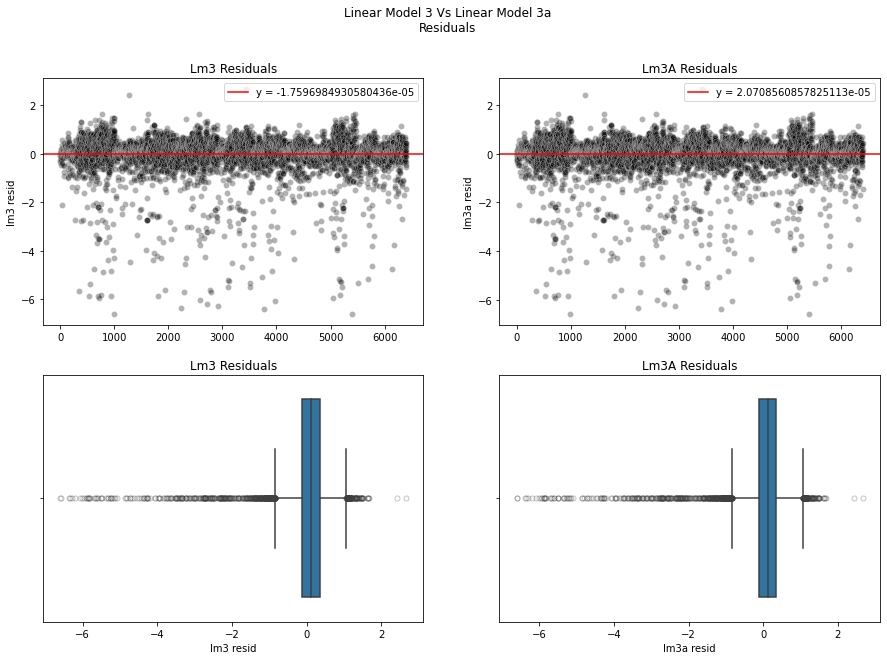

In [51]:
# recall 'y' is still 'sale price log'
# data for linear model 3
neighborhood = pd.get_dummies(df['neighborhood'], prefix='NB')
building = pd.get_dummies(df['building class category'], prefix='B')
sqfts = df[['gross square feet log','land square feet log']]
new_df = sqfts.join(neighborhood)
x3 = new_df.join(building)

# data for linear model 3a
building = pd.get_dummies(df['building class category'], prefix='BB', drop_first=True) # neglect 1 family homes
x3a = new_df.join(building) 

# model
lm3 = LinearRegression()
lm3a = LinearRegression()

# fit
lm3.fit(x3, y)
lm3a.fit(x3a, y)

# predict
pred3 = lm3.predict(x3)
pred3a = lm3a.predict(x3a)

# residuals
df['lm3 resid'] = df['sale price log'] - pred3
df['lm3a resid'] = df['sale price log'] - pred3a

# 2 by 2 plot of residuals scatter plot and boxplot
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Linear Model 3 Vs Linear Model 3a\nResiduals')

sns.scatterplot(x=np.arange(len(x)), y=df['lm3 resid'], alpha=0.3, color='black', ax=ax[0,0])
ax[0,0].axhline(y=df['lm3 resid'].mean(), color='r', label='y = {}'.format(df['lm3 resid'].mean()))
ax[0,0].set_title('lm3 residuals'.title())
ax[0,0].legend()

sns.scatterplot(x=np.arange(len(x)), y=df['lm3a resid'], alpha=0.3, color='black',ax=ax[0,1])
ax[0,1].axhline(y=df['lm3a resid'].mean(), color='r', 
                label='y = {}'.format(df['lm3a resid'].mean()))
ax[0,1].set_title('lm3a residuals'.title())
ax[0,1].legend()

sns.boxplot(x=df['lm3 resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,0])
ax[1,0].set_title('lm3 residuals'.title())

sns.boxplot(x=df['lm3a resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,1])
ax[1,1].set_title('lm3a residuals'.title())

plt.show()

In [52]:
print(regression_metrics(y, pred3))
rse(lm3, df['lm3 resid'])
print(regression_metrics(y,pred3a))
rse(lm3a, df['lm3a resid'])

----------------------------------------
explained variance score:  0.3094
mediocre fit
----------------------------------------
The smaller the better.
mean absolute error:  0.4447
----------------------------------------
The smaller the better.
mean squared error:  0.6282
----------------------------------------
The smaller the better. Comparing models?
->root mean squared error:  0.7926
----------------------------------------
R2 score:  0.3094
mediocre fit

----------------------------------------
The smaller the value the better.
Residual Standard Error: 0.7966 with 6334 degrees of freedom
----------------------------------------
explained variance score:  0.3094
mediocre fit
----------------------------------------
The smaller the better.
mean absolute error:  0.4447
----------------------------------------
The smaller the better.
mean squared error:  0.6282
----------------------------------------
The smaller the better. Comparing models?
->root mean squared error:  0.7926
-----

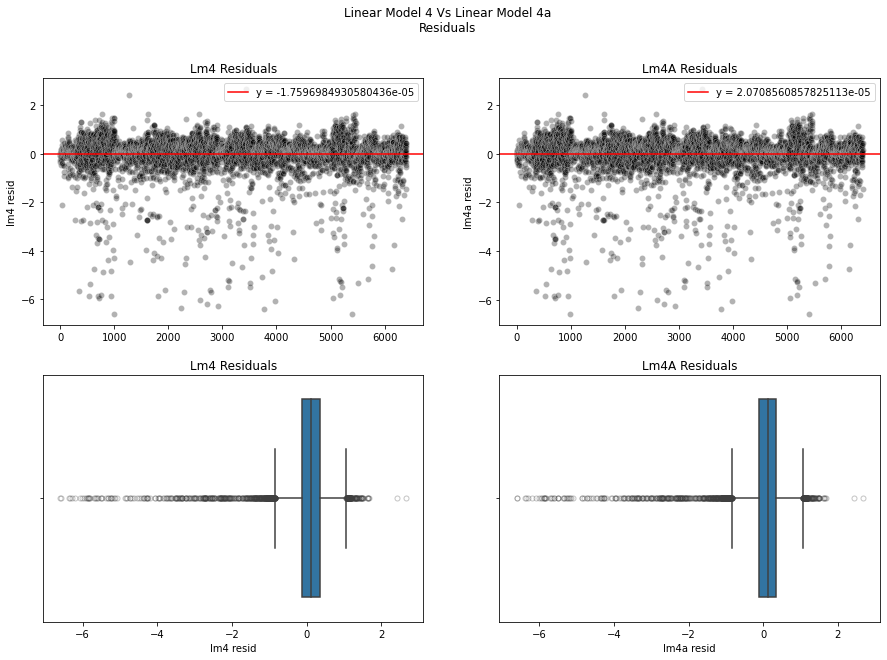

In [53]:
# recall 'y' is still 'sale price log'
# data for linear model 4
neighborhood = pd.get_dummies(df['neighborhood'], prefix='NB')
building = pd.get_dummies(df['building class category'], prefix='B')
sqfts = df[['gross square feet log','land square feet log']]
new_df = sqfts.join(neighborhood)
x4 = new_df.join(building)

# data for linear model 4a
building = pd.get_dummies(df['building class category'], prefix='BB', drop_first=True) # neglect 1 family homes
x4a = new_df.join(building) 

# model
lm4 = LinearRegression()
lm4a = LinearRegression()

# fit
lm4.fit(x4, y)
lm4a.fit(x4a, y)

# predict
pred4 = lm4.predict(x4)
pred4a = lm4a.predict(x4a)

# residuals
df['lm4 resid'] = df['sale price log'] - pred4
df['lm4a resid'] = df['sale price log'] - pred4a

# 2 by 2 plot of residuals scatter plot and boxplot
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle('Linear Model 4 Vs Linear Model 4a\nResiduals')

sns.scatterplot(x=np.arange(len(x)), y=df['lm4 resid'], alpha=0.3, color='black', ax=ax[0,0])
ax[0,0].axhline(y=df['lm4 resid'].mean(), color='r', label='y = {}'.format(df['lm4 resid'].mean()))
ax[0,0].set_title('lm4 residuals'.title())
ax[0,0].legend()

sns.scatterplot(x=np.arange(len(x)), y=df['lm4a resid'], alpha=0.3, color='black',ax=ax[0,1])
ax[0,1].axhline(y=df['lm4a resid'].mean(), color='r', 
                label='y = {}'.format(df['lm4a resid'].mean()))
ax[0,1].set_title('lm4a residuals'.title())
ax[0,1].legend()

sns.boxplot(x=df['lm4 resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,0])
ax[1,0].set_title('lm4 residuals'.title())

sns.boxplot(x=df['lm4a resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,1])
ax[1,1].set_title('lm4a residuals'.title())

plt.show()

In [54]:
print(regression_metrics(y, pred4))
rse(lm4, df['lm4 resid'])
print('-'*40)
print(regression_metrics(y,pred4a))
rse(lm4a, df['lm4a resid'])

----------------------------------------
explained variance score:  0.3094
mediocre fit
----------------------------------------
The smaller the better.
mean absolute error:  0.4447
----------------------------------------
The smaller the better.
mean squared error:  0.6282
----------------------------------------
The smaller the better. Comparing models?
->root mean squared error:  0.7926
----------------------------------------
R2 score:  0.3094
mediocre fit

----------------------------------------
The smaller the value the better.
Residual Standard Error: 0.7966 with 6334 degrees of freedom
----------------------------------------
----------------------------------------
explained variance score:  0.3094
mediocre fit
----------------------------------------
The smaller the better.
mean absolute error:  0.4447
----------------------------------------
The smaller the better.
mean squared error:  0.6282
----------------------------------------
The smaller the better. Comparing models?

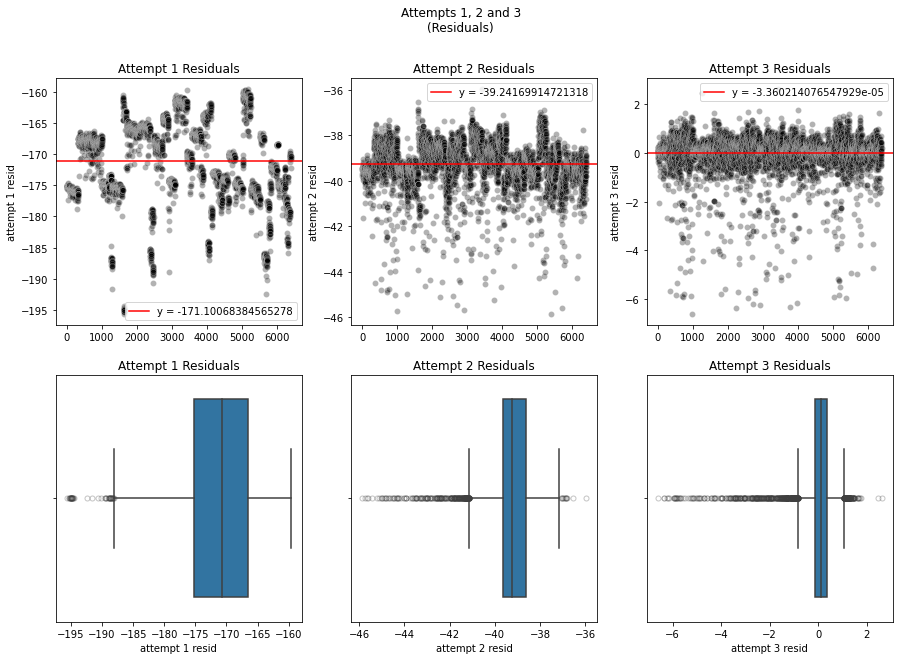

In [61]:
## interact neighborhood and building type
# things we must define
y = df['sale price log']

sqfts = df[['land square feet log','gross square feet log']]
neighborhood = pd.get_dummies(df['neighborhood'])
buildings = pd.get_dummies(df['building class category'])

neigh = [ str(hood).strip() for hood in df.neighborhood ]
build = [ str(domicile).strip() for domicile in df['building class category']]

neighbuild = [ neigh[i] + ' ' + build[i] for i in range(len(build))]

## add to datafile
df['neighbuild'] = neighbuild

neighbuild = pd.get_dummies(df.neighbuild)

# ATTEMPT 1: not real math, Superposition
## model
lm = LinearRegression()
lm1 = LinearRegression()
lm2 = LinearRegression()

## fit
lm.fit(sqfts, y) # sqfts
lm1.fit(neighborhood, y) # neighborhood
lm2.fit(buildings, y) # buildings

## predict
y1 = lm.predict(sqfts)
y2 = lm1.predict(neighborhood)
y3 = lm2.predict(buildings)

att1_predY = y1 + ( y2 * y3 )
## add to datafile
df['attempt 1 resid'] = y - att1_predY

# ATTEMPT 2: almost real math, Superposition 1

## model
lm = LinearRegression()
lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()

## fit
lm.fit(sqfts, y) # sqfts
lm1.fit(neighborhood, y) # neighborhood
lm2.fit(buildings, y) # buildings
lm3.fit(neighbuild, y) # neighbuild

## predict
y1 = lm.predict(sqfts)
y2 = lm1.predict(neighborhood)
y3 = lm2.predict(buildings)
y4 = lm3.predict(neighbuild)

att2_predY = y1 + y2 + y3 + y4

## add to datafile
df['attempt 2 resid'] = y - att2_predY

# ATTEMPT 3
## model
lm = LinearRegression()

## fit
### join dfs
new_df = sqfts.join(neighborhood)
new_df = new_df.join(buildings)
new_df = new_df.join(neighbuild)

## fit
lm.fit(new_df, y)

## predict
att3_predY = lm.predict(new_df)

df['attempt 3 resid'] = y - att3_predY

# plot
fig, ax = plt.subplots(2,3, figsize=(15, 10))

## subtitle
fig.suptitle('Attempts 1, 2 and 3\n(Residuals)')

sns.scatterplot(x=np.arange(len(df['attempt 1 resid'])), y=df['attempt 1 resid'], alpha=0.3, color='black', ax=ax[0,0])
ax[0,0].axhline(y=df['attempt 1 resid'].mean(), color='r', label='y = {}'.format(df['attempt 1 resid'].mean()))
ax[0,0].set_title('attempt 1 residuals'.title())
ax[0,0].legend()

sns.boxplot(x=df['attempt 1 resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,0])
ax[1,0].set_title('attempt 1 residuals'.title())

sns.scatterplot(x=np.arange(len(df['attempt 2 resid'])), y=df['attempt 2 resid'], alpha=0.3, color='black', ax=ax[0,1])
ax[0,1].axhline(y=df['attempt 2 resid'].mean(), color='r', label='y = {}'.format(df['attempt 2 resid'].mean()))
ax[0,1].set_title('attempt 2 residuals'.title())
ax[0,1].legend()

sns.boxplot(x=df['attempt 2 resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,1])
ax[1,1].set_title('attempt 2 residuals'.title())

sns.scatterplot(x=np.arange(len(df['attempt 3 resid'])), y=df['attempt 3 resid'], alpha=0.3, color='black', ax=ax[0,2])
ax[0,2].axhline(y=df['attempt 3 resid'].mean(), color='r', label='y = {}'.format(df['attempt 3 resid'].mean()))
ax[0,2].set_title('attempt 3 residuals'.title())
ax[0,2].legend()

sns.boxplot(x=df['attempt 3 resid'],
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1,2])
ax[1,2].set_title('attempt 3 residuals'.title())

plt.show()

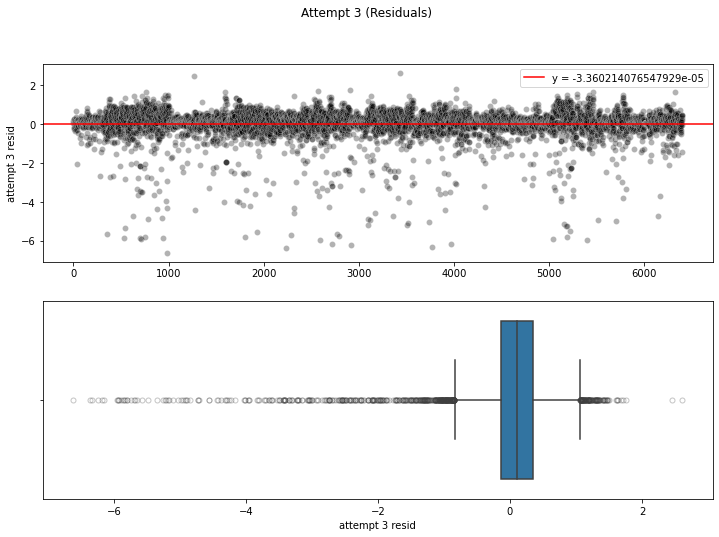

In [56]:
# closer look at attempt 3
fig, ax = plt.subplots(2, 1,figsize=(12, 8))

fig.suptitle('attempt 3 (residuals)'.title())

sns.scatterplot(x=np.arange(len(df['attempt 3 resid'])), y=df['attempt 3 resid'], alpha=0.3, color='black', ax=ax[0])
ax[0].axhline(y=df['attempt 3 resid'].mean(), color='r', label='y = {}'.format(df['attempt 3 resid'].mean()))
ax[0].legend()

sns.boxplot(x=df['attempt 3 resid'], 
            flierprops={'marker': 'o', 'fillstyle':'none', 'alpha':0.3}, ax=ax[1])

plt.show()

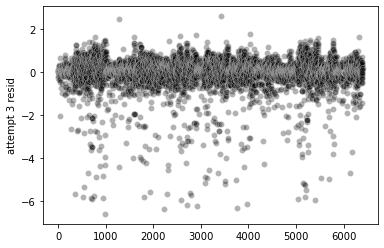

In [57]:
sns.scatterplot(x=np.arange(len(df['attempt 3 resid'])), y=df['attempt 3 resid'], alpha=0.3, color='black')
plt.show()

In [58]:
df['attempt 3 resid'].describe()

count    6399.000000
mean       -0.000034
std         0.780735
min        -6.616080
25%        -0.128612
50%         0.112192
75%         0.346878
max         2.608464
Name: attempt 3 resid, dtype: float64

We were able to successfully create Ben's 'model4' residuals. A quick glance at the description of the residuals tells us we have successfully replicated Bens residuals within three significant figures.

In [59]:
print(regression_metrics(y, att3_predY))
rse(lm, df['attempt 3 resid'])

----------------------------------------
explained variance score:  0.3299
mediocre fit
----------------------------------------
The smaller the better.
mean absolute error:  0.4391
----------------------------------------
The smaller the better.
mean squared error:  0.6095
----------------------------------------
The smaller the better. Comparing models?
->root mean squared error:  0.7807
----------------------------------------
R2 score:  0.3299
mediocre fit

----------------------------------------
The smaller the value the better.
Residual Standard Error: 0.7955 with 6163 degrees of freedom


## Conclusion


In [60]:
# save output
df.to_csv('Noes BRKLYN lm OP.csv')